<a href="https://colab.research.google.com/github/raditya-aisy/All_about_Data_2/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **10 FOLD CV & SVM**

Sensitivity: 0.80
Specificity: 1.00
Accuracy: 0.90%
F1-Score: 0.90


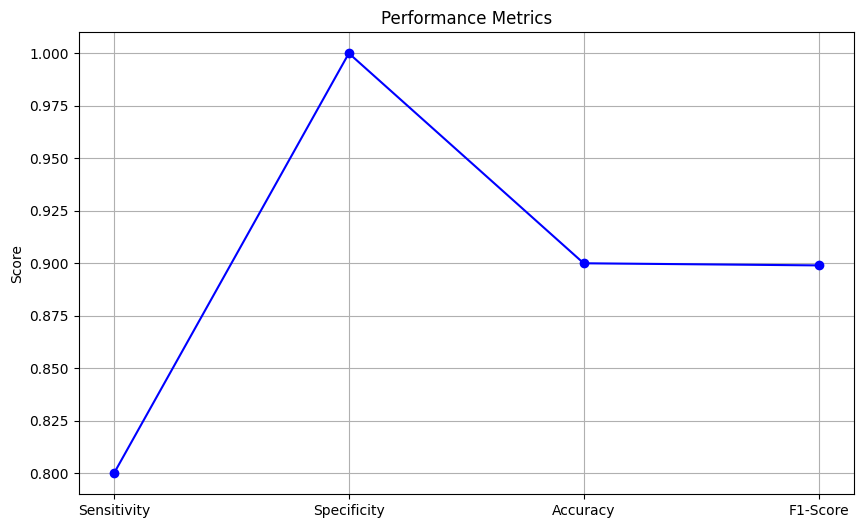

Input baru tergolong ke dalam kelas: E


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC # SVM

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt

"""
PROSES DATA READING :
Membaca data yang diinputkan
"""
file_path = '/content/CPA1.xlsx'
data = pd.read_excel(file_path)

"""
PROSES DATA CLEANING :
Pembersihan data digunakan agar hasil tidak overfiting dengan cara :
1. Menghapus data duplikat
2. Memeriksa missing values
3. Normalisasi
"""
# 1. Menghapus data duplikat
data = data.drop_duplicates()

# 2. Memeriksa missing values
if data.isnull().sum().sum() > 0:
    data = data.dropna()  # Menghapus baris dengan missing value

# 3. Normalisasi data (Opsional)
scaler = StandardScaler()
feature_columns = ['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']
data[feature_columns] = scaler.fit_transform(data[feature_columns])

"""
PROSES DATA PREPARATION :
Encoding kelas target, proses mengubah value yang bukan skalar diubah menjadi skalar
agar bisa terbaca saat klasifikasi.
"""

# Memisahkan features dan target
X = data[feature_columns].values
y = data['kelas'].values

# Encoding kelas target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

"""
PROSES TRAINING MODEL :
Melakukan pelatihan model dari data yang sudah diolah.
"""
# Mendefinisikan model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Mendefinisikan K-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan metrik
sensitivity_scores = []
specificity_scores = []
accuracy_scores = []
f1_scores = []

# Melakukan K-fold cross-validation
for train_index, test_index in skf.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Training model
    svm_model.fit(X_train, y_train)

    # Prediksi
    y_pred = svm_model.predict(X_test)

    # Menghitung metrik
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menyimpan skor
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

"""
DISPLAY PERFORMANCE METRICS :
"""
# Mencetak rata-rata metrik
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}%')
print(f'F1-Score: {f1:.2f}')

# Visualisasi Metrik Performa
plt.figure(figsize=(10, 6))
metrics = ['Sensitivity', 'Specificity', 'Accuracy', 'F1-Score']
values = [sensitivity, specificity, accuracy, f1]
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.show()

"""
PROSES TESTING
"""
# Contoh input baru
new_input = [[0.45, 0.22, 0.15, 0.10, 0.08]]

new_input_scaled = scaler.transform(new_input)
new_prediction = svm_model.predict(new_input_scaled)
predicted_class = label_encoder.inverse_transform(new_prediction)[0]

print(f"Input baru tergolong ke dalam kelas: {predicted_class}")

# **10 FOLD CV & KNN**

Sensitivity: 1.00
Specificity: 0.90
Accuracy: 0.95%
F1-Score: 0.95


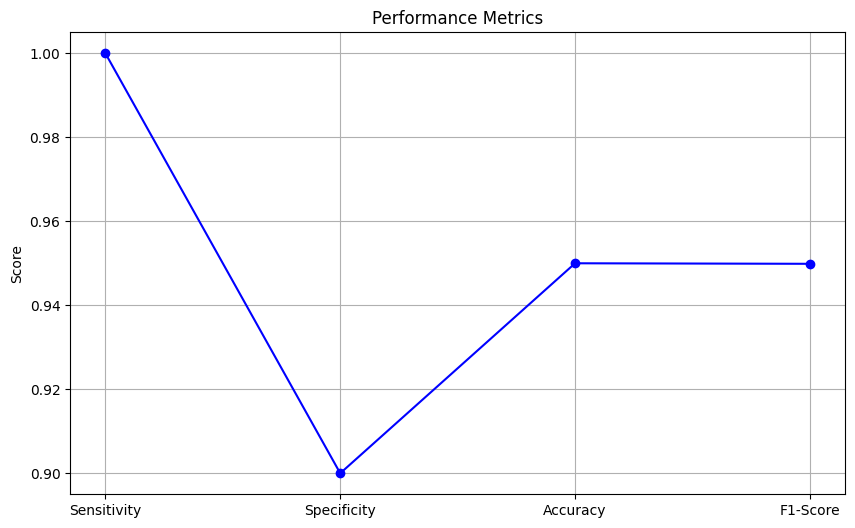

Input baru tergolong ke dalam kelas: E


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier  # KNN

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt

"""
PROSES DATA READING :
Membaca data yang diinputkan
"""
# Membaca data
file_path = '/content/CPA1.xlsx'
data = pd.read_excel(file_path)

"""
PROSES DATA CLEANING :
Pembersihan data digunakan agar hasil tidak overfiting dengan cara :
1. Menghapus data duplikat
2. Memeriksa missing values
3. Normalisasi
"""
# 1. Menghapus data duplikat
data = data.drop_duplicates()

# 2. Memeriksa missing values
if data.isnull().sum().sum() > 0:
    data = data.dropna()  # Menghapus baris dengan missing value

# 3. Normalisasi data (Opsional)
scaler = StandardScaler()
feature_columns = ['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']
data[feature_columns] = scaler.fit_transform(data[feature_columns])

"""
PROSES DATA PREPARATION :
Encoding kelas target, proses mengubah value yang bukan skalar diubah menjadi skalar
agar bisa terbaca saat klasifikasi.
"""
# Memisahkan features dan target
X = data[feature_columns].values
y = data['kelas'].values

# Encoding kelas target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

"""
PROSES TRAINING MODEL :
Melakukan pelatihan model dari data yang sudah diolah.
"""
# Mendefinisikan model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Asumsikan menggunakan 5 tetangga

# Mendefinisikan K-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan metrik
sensitivity_scores = []
specificity_scores = []
accuracy_scores = []
f1_scores = []

# Melakukan K-fold cross-validation
for train_index, test_index in skf.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Training model KNN
    knn_model.fit(X_train, y_train)

    # Prediksi
    y_pred = knn_model.predict(X_test)

    # Menghitung metrik
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menyimpan skor
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

"""
DISPLAY PERFORMANCE METRICS :
"""
# Mencetak rata-rata metrik
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}%')
print(f'F1-Score: {f1:.2f}')

# Visualisasi Metrik Performa
plt.figure(figsize=(10, 6))
metrics = ['Sensitivity', 'Specificity', 'Accuracy', 'F1-Score']
values = [sensitivity, specificity, accuracy, f1]
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.show()

"""
PROSES TESTING
"""
# Contoh input baru
new_input = [[0.45, 0.22, 0.15, 0.10, 0.08]]

new_input_scaled = scaler.transform(new_input)
new_prediction = svm_model.predict(new_input_scaled)
predicted_class = label_encoder.inverse_transform(new_prediction)[0]

print(f"Input baru tergolong ke dalam kelas: {predicted_class}")

# **75% TRAINING, 25% TESTING & SVM**

Sensitivity: 0.78
Specificity: 0.81
Accuracy: 0.80%
F1-Score: 0.80


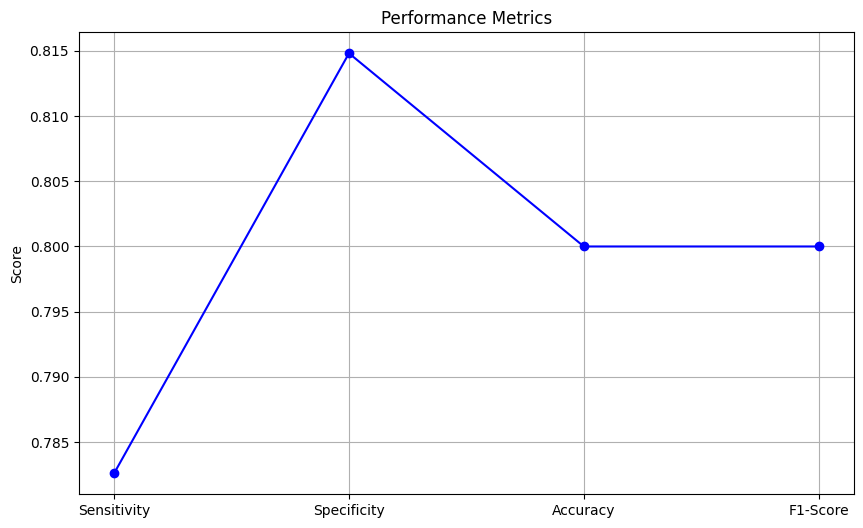

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Membaca data
file_path = '/content/CPA1.xlsx'
data = pd.read_excel(file_path)

# Menghapus data duplikat dan memeriksa missing values
data = data.drop_duplicates()
if data.isnull().sum().sum() > 0:
    data = data.dropna()  # Menghapus baris dengan missing value

# Normalisasi data
scaler = StandardScaler()
feature_columns = ['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Memisahkan features dan target
X = data[feature_columns].values
y = data['kelas'].values

# Encoding kelas target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi training dan testing set (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Mendefinisikan dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi menggunakan data testing
y_pred = svm_model.predict(X_test)

# Menghitung dan menampilkan metrik
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menyimpan skor
sensitivity_scores = [sensitivity]
specificity_scores = [specificity]
accuracy_scores = [accuracy]
f1_scores = [f1]

# Mencetak rata-rata metrik
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}%')
print(f'F1-Score: {f1:.2f}')

# Visualisasi Metrik Performa
plt.figure(figsize=(10, 6))
metrics = ['Sensitivity', 'Specificity', 'Accuracy', 'F1-Score']
values = [sensitivity, specificity, accuracy, f1]
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.show()

"""
PROSES TESTING
"""
# Contoh input baru
new_input = [[0.45, 0.22, 0.15, 0.10, 0.08]]

new_input_scaled = scaler.transform(new_input)
new_prediction = svm_model.predict(new_input_scaled)
predicted_class = label_encoder.inverse_transform(new_prediction)[0]

print(f"Input baru tergolong ke dalam kelas: {predicted_class}")

# **75% TRAINING, 25% TESTING & KNN**

Sensitivity: 0.87
Specificity: 0.67
Accuracy: 0.76%
F1-Score: 0.76


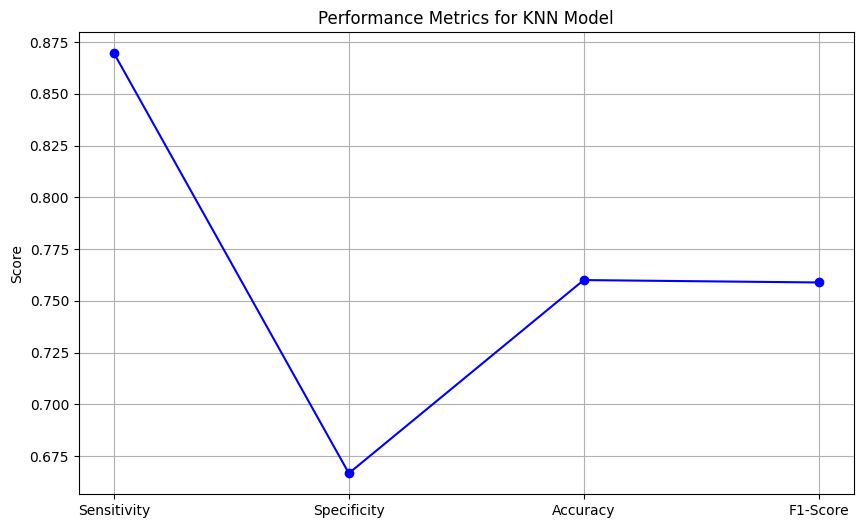

Input baru tergolong ke dalam kelas: E


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Import KNN classifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Membaca data
file_path = '/content/CPA1.xlsx'
data = pd.read_excel(file_path)

# Menghapus data duplikat dan memeriksa missing values
data = data.drop_duplicates()
if data.isnull().sum().sum() > 0:
    data = data.dropna()  # Menghapus baris dengan missing value

# Normalisasi data
scaler = StandardScaler()
feature_columns = ['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Memisahkan features dan target
X = data[feature_columns].values
y = data['kelas'].values

# Encoding kelas target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi training dan testing set (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Mendefinisikan dan melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Tentukan jumlah tetangga
knn_model.fit(X_train, y_train)

# Prediksi menggunakan data testing
y_pred = knn_model.predict(X_test)

# Menghitung dan menampilkan metrik
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menyimpan skor
sensitivity_scores = [sensitivity]
specificity_scores = [specificity]
accuracy_scores = [accuracy]
f1_scores = [f1]

# Mencetak rata-rata metrik
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}%')
print(f'F1-Score: {f1:.2f}')

# Visualisasi Metrik Performa
plt.figure(figsize=(10, 6))
metrics = ['Sensitivity', 'Specificity', 'Accuracy', 'F1-Score']
values = [sensitivity, specificity, accuracy, f1]
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics for KNN Model')
plt.ylabel('Score')
plt.grid(True)
plt.show()

"""
PROSES TESTING
"""
# Contoh input baru
new_input = [[0.45, 0.22, 0.15, 0.10, 0.08]]

new_input_scaled = scaler.transform(new_input)
new_prediction = svm_model.predict(new_input_scaled)
predicted_class = label_encoder.inverse_transform(new_prediction)[0]

print(f"Input baru tergolong ke dalam kelas: {predicted_class}")

# **50% training, 25% validation, dan 25% testing & SVM**

Sensitivity: 0.87
Specificity: 0.81
Accuracy: 0.84%
F1-Score: 0.84


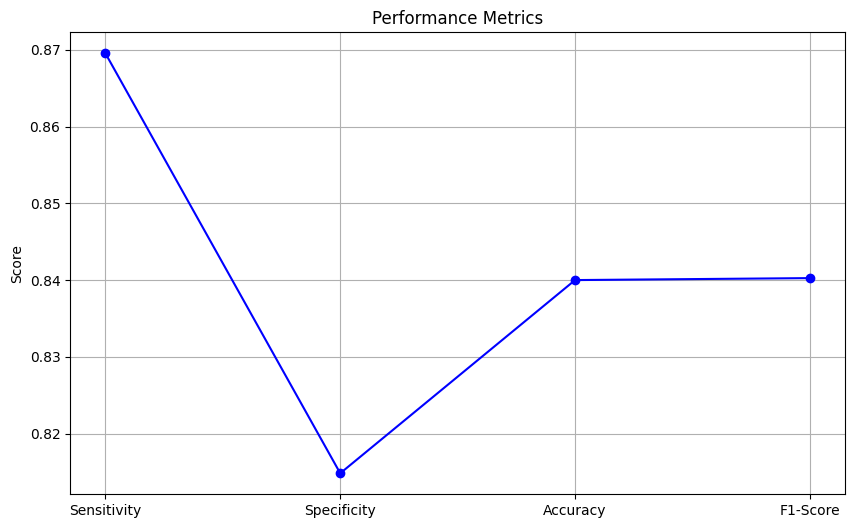

Input baru tergolong ke dalam kelas: E


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Membaca data
file_path = '/content/CPA1.xlsx'
data = pd.read_excel(file_path)

# Menghapus data duplikat dan memeriksa missing values
data = data.drop_duplicates()
if data.isnull().sum().sum() > 0:
    data = data.dropna()  # Menghapus baris dengan missing value

# Normalisasi data
scaler = StandardScaler()
feature_columns = ['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Memisahkan features dan target
X = data[feature_columns].values
y = data['kelas'].values

# Encoding kelas target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi training (75%) dan testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Kemudian, bagi X_train dan y_train lebih lanjut menjadi training baru (66.67% dari 75%, atau 50% dari total) dan validation (33.33% dari 75%, atau 25% dari total)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42)

# Mendefinisikan dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi menggunakan data validation untuk tuning atau early stopping
y_val_pred = svm_model.predict(X_val)

# Prediksi menggunakan data testing untuk evaluasi akhir
y_pred = svm_model.predict(X_test)

# Menghitung dan menampilkan metrik
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menyimpan skor
sensitivity_scores = [sensitivity]
specificity_scores = [specificity]
accuracy_scores = [accuracy]
f1_scores = [f1]

# Mencetak rata-rata metrik
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}%')
print(f'F1-Score: {f1:.2f}')

# Visualisasi Metrik Performa
plt.figure(figsize=(10, 6))
metrics = ['Sensitivity', 'Specificity', 'Accuracy', 'F1-Score']
values = [sensitivity, specificity, accuracy, f1]
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.show()

"""
PROSES TESTING
"""
# Contoh input baru
new_input = [[0.45, 0.22, 0.15, 0.10, 0.08]]

new_input_scaled = scaler.transform(new_input)
new_prediction = svm_model.predict(new_input_scaled)
predicted_class = label_encoder.inverse_transform(new_prediction)[0]

print(f"Input baru tergolong ke dalam kelas: {predicted_class}")

# **50% training, 25% validation, dan 25% testing & KNN**

Sensitivity: 0.83
Specificity: 0.70
Accuracy: 0.76%
F1-Score: 0.76


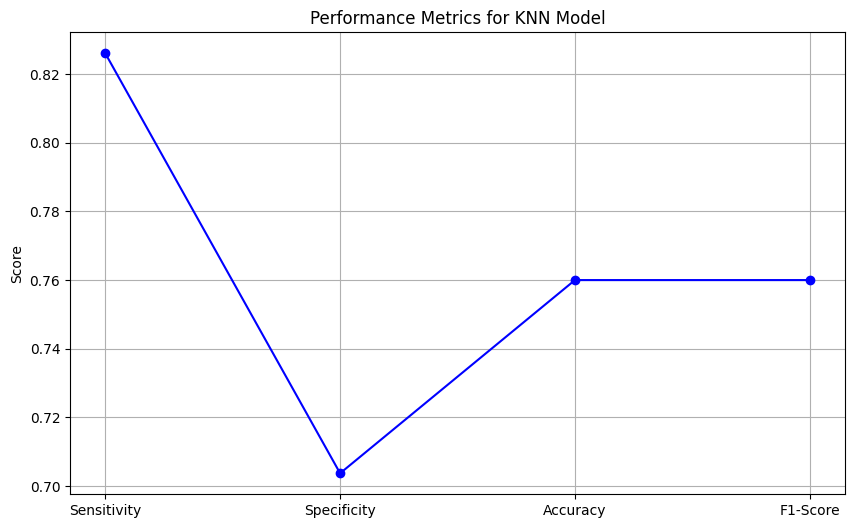

Input baru tergolong ke dalam kelas: E


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Mengganti SVM dengan KNN
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Membaca data
file_path = '/content/CPA1.xlsx'
data = pd.read_excel(file_path)

# Menghapus data duplikat dan memeriksa missing values
data = data.drop_duplicates()
if data.isnull().sum().sum() > 0:
    data = data.dropna()  # Menghapus baris dengan missing value

# Normalisasi data
scaler = StandardScaler()
feature_columns = ['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Memisahkan features dan target
X = data[feature_columns].values
y = data['kelas'].values

# Encoding kelas target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi training, validation, dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42)

# Mendefinisikan dan melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Menentukan jumlah tetangga
knn_model.fit(X_train, y_train)

# Prediksi menggunakan data validation dan testing
y_val_pred = knn_model.predict(X_val)
y_pred = knn_model.predict(X_test)

# Menghitung dan menampilkan metrik untuk set testing
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menyimpan skor
sensitivity_scores = [sensitivity]
specificity_scores = [specificity]
accuracy_scores = [accuracy]
f1_scores = [f1]

# Mencetak rata-rata metrik
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}%')
print(f'F1-Score: {f1:.2f}')

# Visualisasi Metrik Performa
plt.figure(figsize=(10, 6))
metrics = ['Sensitivity', 'Specificity', 'Accuracy', 'F1-Score']
values = [sensitivity, specificity, accuracy, f1]
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics for KNN Model')
plt.ylabel('Score')
plt.grid(True)
plt.show()

"""
PROSES TESTING
"""
# Contoh input baru
new_input = [[0.45, 0.22, 0.15, 0.10, 0.08]]

new_input_scaled = scaler.transform(new_input)
new_prediction = svm_model.predict(new_input_scaled)
predicted_class = label_encoder.inverse_transform(new_prediction)[0]

print(f"Input baru tergolong ke dalam kelas: {predicted_class}")